In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Muelle_poniente.csv", sep = ';')

In [61]:
display(data[:6000])

,EA001-36,Unnamed: 1,EA003-36,Unnamed: 3,EA007-36,Unnamed: 5,EA008-36,Unnamed: 7,Unnamed: 8
0,01/02/2022 4:00:49,"344,8234",01/02/2022 4:00:00,"6198,506",02/02/2022 9:10:36,"3327,48",02/02/2022 9:10:36,"4130,979",NaN
1,01/02/2022 4:01:49,"345,0659",01/02/2022 4:09:06,"6197,347",02/02/2022 9:10:53,"3330,753",02/02/2022 9:10:53,"4131,175",NaN
2,01/02/2022 4:02:49,"345,2543",01/02/2022 4:10:08,"6194,635",02/02/2022 9:11:09,"3317,166",02/02/2022 9:11:09,"4132,429",NaN
3,01/02/2022 4:03:50,"345,5438",01/02/2022 4:11:15,"6193,556",02/02/2022 9:11:38,"3307,536",02/02/2022 9:11:38,"4137,227",NaN
4,01/02/2022 4:04:50,"345,8492",01/02/2022 4:12:44,"6194,496",02/02/2022 9:12:40,"3276,11",02/02/2022 9:12:40,"4143,137",NaN
...,...,...,...,...,...,...,...,...,...
5995,03/02/2022 13:31:30,"339,5268",02/02/2022 16:00:10,"3856,837",04/02/2022 3:30:56,"1605,135",04/02/2022 3:30:56,"3158,511",NaN
5996,03/02/2022 13:32:01,"340,1515",02/02/2022 16:00:21,"3855,114",04/02/2022 3:31:00,"1466,219",04/02/2022 3:31:00,"3163,335",NaN
5997,03/02/2022 13:32:43,"341,05",02/02/2022 16:00:29,"3857,048",04/02/2022 3:31:04,"1876,089",04/02/2022 3:31:04,"3161,985",NaN
5998,03/02/2022 13:33:31,"342,231",02/02/2022 16:00:33,"3856,171",04/02/2022 3:31:07,"1618,708",04/02/2022 3:31:07,"3163,165",NaN


In [5]:
data1 = pd.DataFrame({
    "timestamp": pd.to_datetime(data['EA001-36'], dayfirst = True),
    "value": data['Unnamed: 1']
}).dropna()
data2 = pd.DataFrame({
    "timestamp": pd.to_datetime(data['EA003-36'], dayfirst = True),
    "value": data['Unnamed: 3']
}).dropna()
data3 = pd.DataFrame({
    "timestamp": pd.to_datetime(data['EA008-36'], dayfirst = True),
    "value": data['Unnamed: 5']
}).dropna()

In [6]:
data1['timestamp'] = [(data1['timestamp'].values[i] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s') for i in range(len(data1))]
data2['timestamp'] = [(data2['timestamp'].values[i] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s') for i in range(len(data2))]
data3['timestamp'] = [(data3['timestamp'].values[i] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s') for i in range(len(data3))]

data1['value'] = [float(a.replace(',', '.')) for i, a in enumerate(data1['value'].values)]
data2['value'] = [float(a.replace(',', '.')) for i, a in enumerate(data2['value'].values)]
data3['value'] = [float(a.replace(',', '.')) for i, a in enumerate(data3['value'].values)]

In [107]:
display(data1)
display(data2)
display(data3)

data1.to_csv("alicante_anomalous_event1.csv", index = False)
data2.to_csv("alicante_anomalous_event2.csv", index = False)
data3.to_csv("alicante_anomalous_event3.csv", index = False)

,timestamp,value
0,1.643688e+09,344.8234
1,1.643688e+09,345.0659
2,1.643688e+09,345.2543
3,1.643688e+09,345.5438
4,1.643688e+09,345.8492
...,...,...
41248,1.645098e+09,263.4904
41249,1.645098e+09,271.7355
41250,1.645098e+09,278.4018
41251,1.645098e+09,284.8761


,timestamp,value
0,1.643688e+09,6198.506
1,1.643689e+09,6197.347
2,1.643689e+09,6194.635
3,1.643689e+09,6193.556
4,1.643689e+09,6194.496
...,...,...
45614,1.645098e+09,5660.549
45615,1.645098e+09,5645.323
45616,1.645098e+09,5676.328
45617,1.645098e+09,5689.257


,timestamp,value
0,1.643793e+09,3327.480
1,1.643793e+09,3330.753
2,1.643793e+09,3317.166
3,1.643793e+09,3307.536
4,1.643793e+09,3276.110
...,...,...
40673,1.645098e+09,2138.815
40674,1.645098e+09,2132.444
40675,1.645098e+09,2128.992
40676,1.645098e+09,2123.503


,EA002-26,Unnamed: 1,Unnamed: 2
0,01/02/2022 4:00:00,"1406,248",NaN
1,01/02/2022 4:08:54,"1414,466",NaN
2,01/02/2022 4:09:16,"1424,968",NaN
3,01/02/2022 4:09:40,"1435,479",NaN
4,01/02/2022 4:10:13,"1446,022",NaN
...,...,...,...
9523,17/02/2022 10:54:01,"1349,405",NaN
9524,17/02/2022 11:00:00,"1349,828",NaN
9525,17/02/2022 11:15:00,"1341,344",NaN
9526,17/02/2022 11:21:09,"1338,848",NaN


<ipython-input-94-b3bece9a08ec>:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax.set_xlim([pd.datetime(2022, 2, 1), pd.datetime(2022, 2, 18)])


(19024.0, 19041.0)

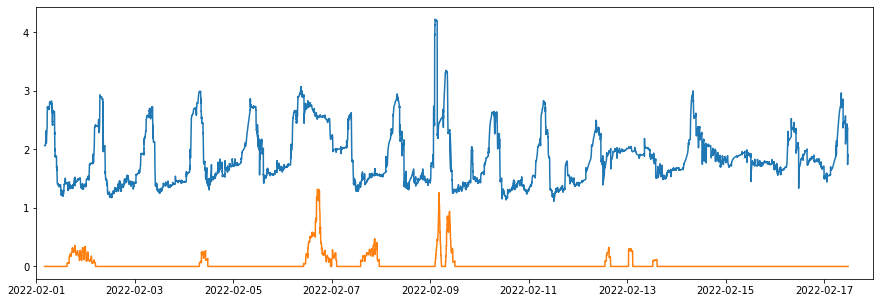

In [94]:
meta_signal = pd.read_csv("../../../log/Alicante/alicante_test2.csv")
expl = pd.read_csv("Explanada.csv", sep = ';')[:-1]
display(expl)


fig, ax = plt.subplots(1, 1, figsize = (15, 5))

ax.plot(pd.to_datetime(data2['timestamp'].values, unit = 's'), data2['value']/3e3)
#ax.plot(pd.to_datetime(expl['EA002-26'].values, dayfirst = True), [float(i.replace(',', '.')) for i in expl['Unnamed: 1']])

ax.plot(pd.to_datetime(meta_signal['timestamp'].values, unit = 's'), meta_signal['status']*1000)
ax.set_xlim([pd.datetime(2022, 2, 1), pd.datetime(2022, 2, 18)])


Timestamp('2022-02-17 11:43:15')

<ipython-input-220-c844e6f7d194>:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax[0].set_xlim([pd.datetime(2021, 11, 10), pd.datetime(2021, 11, 27)])
<ipython-input-220-c844e6f7d194>:18: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax[1].set_xlim([pd.datetime(2021, 11, 10), pd.datetime(2021, 11, 27)])
<ipython-input-220-c844e6f7d194>:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax[2].set_xlim([pd.datetime(2021, 11, 10), pd.datetime(2021, 11, 27)])


Text(0.5, 1.0, 'level')

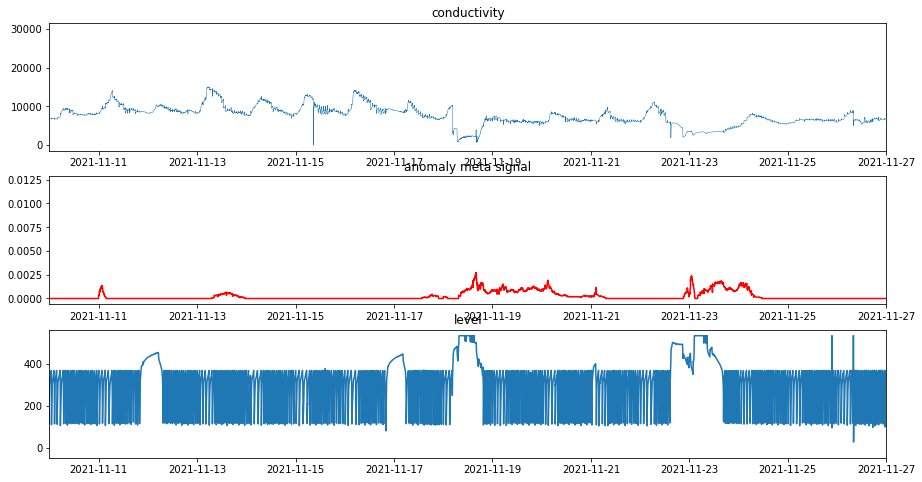

In [220]:
meta_signal = pd.read_csv("../../../log/Alicante/alicante_salinity_long_period.csv")
#expl = pd.read_csv("Explanada.csv", sep = ';')[:-1]

salinity = pd.read_csv("alicante_salinity_EA003_36_conductivity.csv")
level = pd.read_csv("alicante_salinity_EA001_36_level.csv")

fig, ax = plt.subplots(3, 1, figsize = (15, 8))

ax[0].plot(pd.to_datetime(salinity['timestamp'].values, unit = 's'), salinity['value'], lw = 0.5)
#ax.plot(pd.to_datetime(expl['EA002-26'].values, dayfirst = True), [float(i.replace(',', '.')) for i in expl['Unnamed: 1']])

ax[1].plot(pd.to_datetime(meta_signal['timestamp'].values, unit = 's'), meta_signal['status'], c = 'r')
ax[2].plot(pd.to_datetime(level['time'].values, unit = 's'), level['value'])


ax[0].set_xlim([pd.datetime(2021, 11, 10), pd.datetime(2021, 11, 27)])
ax[0].set_title('conductivity')
ax[1].set_xlim([pd.datetime(2021, 11, 10), pd.datetime(2021, 11, 27)])
ax[1].set_title('anomaly meta signal')
ax[2].set_xlim([pd.datetime(2021, 11, 10), pd.datetime(2021, 11, 27)])
ax[2].set_title('level')

#ax.set_ylim([-1000, 17000])

In [211]:
display(meta_signal)

,timestamp,status,status_code,value,suggested_value,algorithm
0,1.631760e+09,0.0,PercentScore,[10251.3],NaN,Combination
1,1.631760e+09,0.0,PercentScore,[10219.22],NaN,Combination
2,1.631760e+09,0.0,PercentScore,[10234.44],NaN,Combination
3,1.631760e+09,0.0,PercentScore,[10231.34],NaN,Combination
4,1.631760e+09,0.0,PercentScore,[10288.46],NaN,Combination
...,...,...,...,...,...,...
251626,1.642459e+09,0.0,PercentScore,[6317.594],NaN,Combination
251627,1.642460e+09,0.0,PercentScore,[6325.622],NaN,Combination
251628,1.642460e+09,0.0,PercentScore,[6335.034],NaN,Combination
251629,1.642460e+09,0.0,PercentScore,[6350.258],NaN,Combination
